### Abdalla Farid & Graells Noah

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Ex1 - Load the data

In [2]:
colors = ["red", "green", "blue", "orange", "purple"]

X1,label1 = pickle.load(open("dataset_1.pkl","rb"), encoding='latin1')
X2,label2 = pickle.load(open("dataset_2.pkl","rb"), encoding='latin1')

### K-means

In [3]:
def initCentroid(centroid_number, X):
    centroids = []
    for i in range(centroid_number):
        step = len(X) / centroid_number
        sorted_array = np.sort(X)
        #centroids.append(np.random.random((1, 2)) * 14 - 7) # Random version
        centroids.append(sorted_array[int(i * step)])
    return centroids

def kmeans(n_class, X):
    centroids = initCentroid(n_class, X)
    
    for i in range(10):
        # Init a dictionary that will hold {id_centroid : [array of point closest to this centroid]}
        centroid_dic = {}
        for id_centroid in range(len(centroids)):
            centroid_dic[id_centroid] = []

        for point in X:
            # Creation of a dictionary that will hold {id_centroid : [distance from this point to the centroid]}
            distances = {}
            for id_centroid in range(len(centroids)):
                distances[id_centroid] = []
                dist = np.linalg.norm(point - centroids[id_centroid])
                distances[id_centroid].append(dist)
            closest_centroid = min(distances.items(), key=lambda x: x[1])[0]
            centroid_dic[closest_centroid].append(point)
            
        for key, value in centroid_dic.items():
            centroid_dic[key] = np.array(value)
            
            plt.scatter(centroid_dic[key][:, 0], centroid_dic[key][:, 1], 
                        alpha=0.6, color=colors[key], edgecolors='none', s=30)

        centroids = np.empty((n_class, 2))
        
        # For each array, calculate the new centroid
        for key, centroid in centroid_dic.items():
            new_centroid = np.mean(centroid, axis=0)
            centroids[key] = new_centroid
       
        #plt.scatter(X[:, 0], X[:, 1], color="blue")
        
        
        plt.scatter(centroids[:, 0], centroids[:,1], color="orange")
        plt.show()
    

### Dataset 1

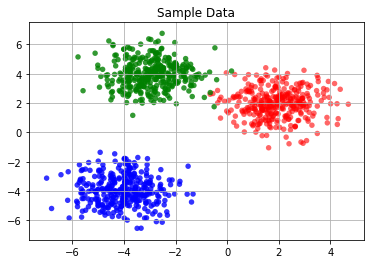

In [4]:
c1 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 0])
c2 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 1])
c3 = np.array([X1[i] for i in range(len(label1)) if label1[i] == 2])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)

plt.title('Sample Data')
#plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.grid(True)
plt.show()

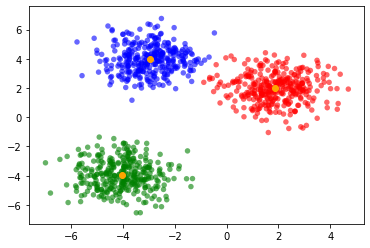

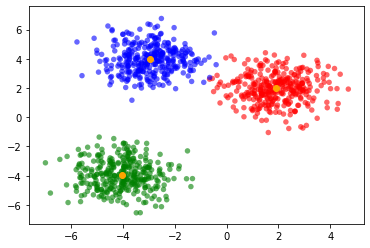

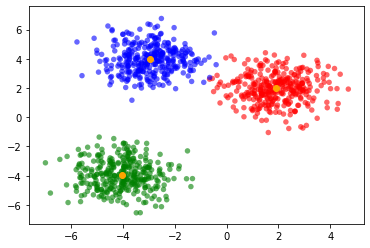

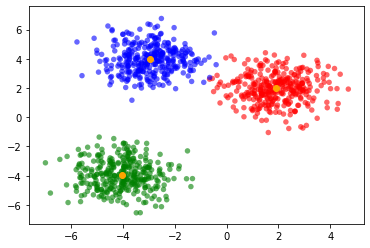

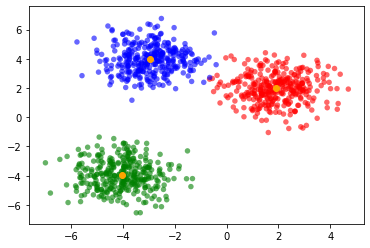

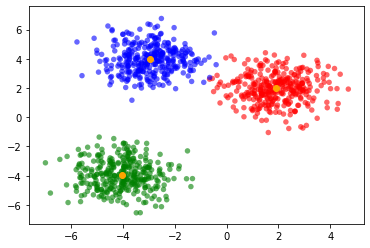

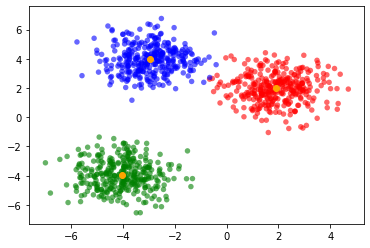

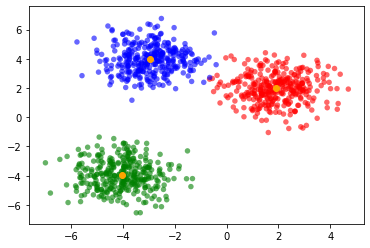

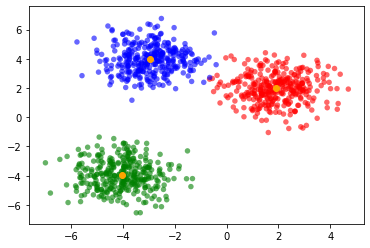

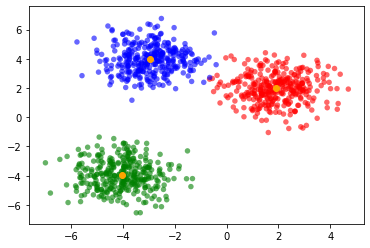

In [5]:
kmeans(3, X1)

### Dataset 2

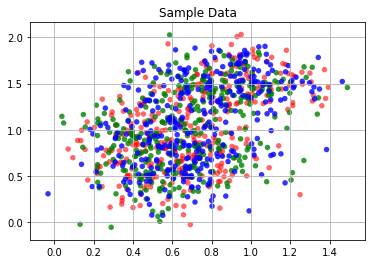

In [6]:
c1 = np.array([X2[i] for i in range(len(label1)) if label1[i] == 0])
c2 = np.array([X2[i] for i in range(len(label1)) if label1[i] == 1])
c3 = np.array([X2[i] for i in range(len(label1)) if label1[i] == 2])

plt.scatter(c1[:, 0], c1[:,1], alpha=0.6, c=colors[0], edgecolors='none', s=30)
plt.scatter(c2[:, 0], c2[:,1], alpha=0.8, c=colors[1], edgecolors='none', s=30)
plt.scatter(c3[:, 0], c3[:,1], alpha=0.8, c=colors[2], edgecolors='none', s=30)

plt.title('Sample Data')
#plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.grid(True)
plt.show()

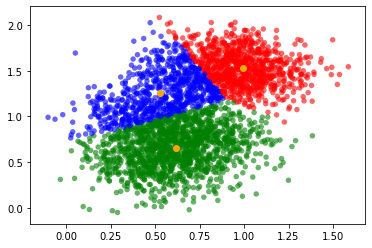

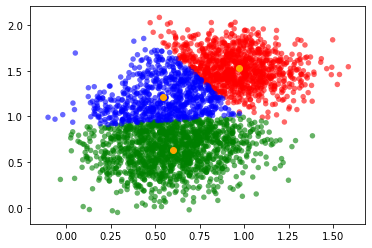

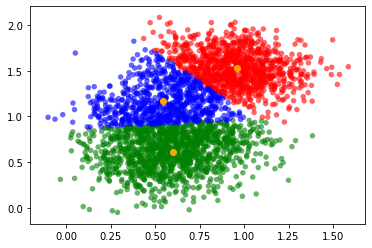

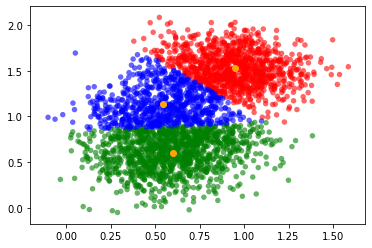

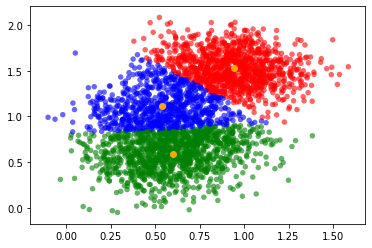

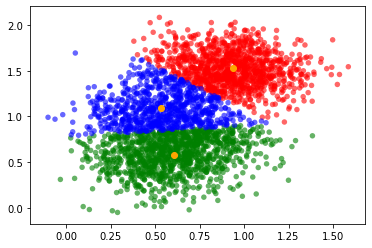

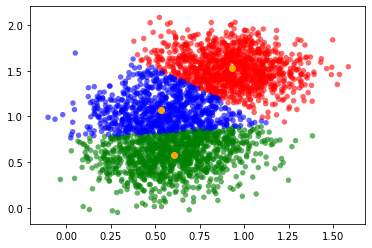

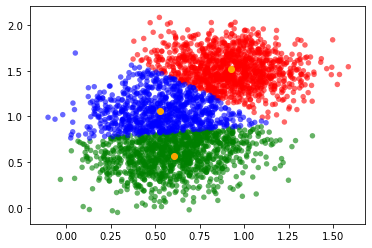

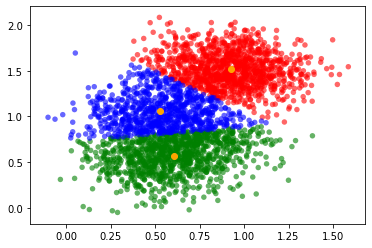

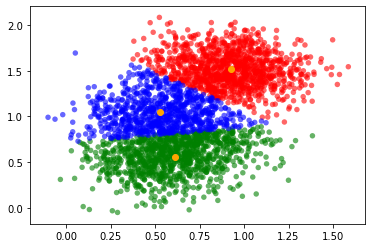

In [7]:
kmeans(3, X2)

— Visualize your convergence criteria over the epochs 1 using the dataset 1.
— Do you experience sensitivity to the initial values of the centroids ? Is your strategy for
initialization working well in most cases ?
— Document your convergence criteria. Could you think about other convergence criteria ?
— Visualize your convergence criteria over time using the dataset 2.

- 2 critères d'utilisations ont étés utilisées. Le premier consiste à initialiser des centroids aléatoirement, mais cela peut causer comme problème d'avoir 2 centroids assez proche ce qui pose problème au niveau de la convergence. Une autre solution retenue est de trier les données en x et de prendre des centroids parmis le dataset, c'est à dire pour 3 centroids prendre le premier point de cette liste trié comme centroid, celui du milieu et le dernier. Néanmoins, avec cette solution les centroids sont déjà presque correctement placé pour le dataset X1.
- Comme critère de convergence, nous avons utilisé le fait de définir le nombre d'itérations manuellement, il serait possible de définir l'arret quand les centroids ne bougent plus ou très peu (selon un epsilon).

- Comme les points du dataset ne sont pas groupé par classe, k-means n'arrive pas à le classer correctement